In [197]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math
import scipy.fft as fft

In [198]:
sampling = 0.1

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100

In [199]:
def FFT(data):
    return fft.fft(data, len(data))#vendor DFT

def getFreqAxis(x):
    samplingFreq = 1/sampling
    return np.arange(-samplingFreq/2, samplingFreq/2, samplingFreq/len(x))

#plots fft of incoming data in frequency space
def plotFFT(x, ft, color = 'red'):
    fftData = ft
    
    tmp = np.split(fftData, 2)
    fs = np.concatenate([tmp[1], tmp[0]])
    
    freqAxis = getFreqAxis(x)
    
    plt.plot(freqAxis, np.abs(fs), color = color)    

In [200]:
def iFFT(data):
    return fft.ifft(data)

In [201]:
N = 100 #window width
def Hann(n):
    return np.sin(np.pi*n/N)**2
def Hanning(n):
    return 0.53836 - 0.46164*np.cos(2*np.pi*n/(N-1))

In [202]:
x = np.arange(-5, 5, sampling)
data = np.sin(np.sin(x))

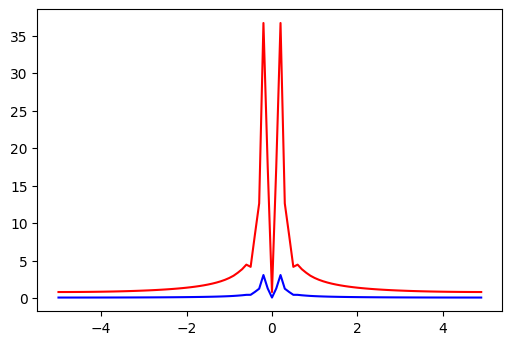

In [203]:
#normal FFT of sin
plotFFT(x, FFT(data))
#windowed FFT of sin
plotFFT(x, FFT(data*np.vectorize(Hanning)(x)), color = 'blue')

In [204]:
data = [1 if abs(val)<=0.5 else 0 for val in x]

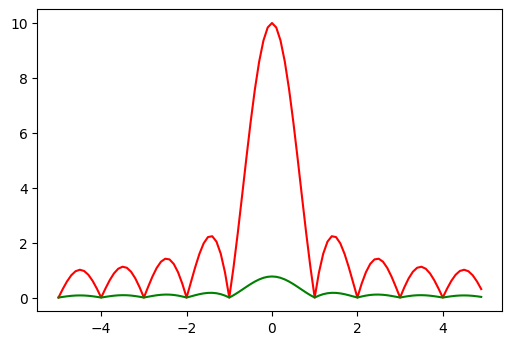

In [205]:
plotFFT(x, FFT(data), color = 'red')
plotFFT(x, FFT(data*np.vectorize(Hanning)(x)), color = 'green')

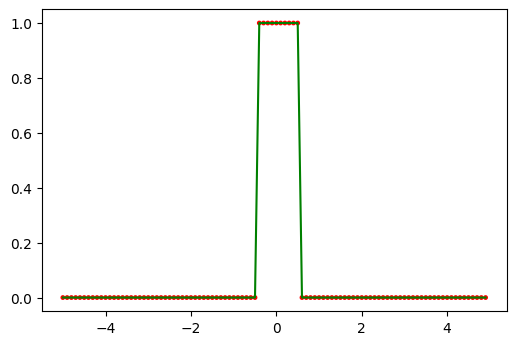

In [206]:
#inverse of windowed rect fucntion
plt.plot(x, np.real(iFFT(FFT(data*np.vectorize(Hanning)(x)))/np.vectorize(Hanning)(x)), color = 'green')
#rect function as red dots
plt.scatter(x, data, s = [6 for i in range(len(x))], color = 'red')

In [207]:
def func(x):
    return 1 - x

def evenFunc(x):
    return func(x) if x > 0 else func(-x)
def oddFunc(x):
    return func(x) if x > 0 else -func(-x)

In [208]:
data = np.vectorize(oddFunc)(x)

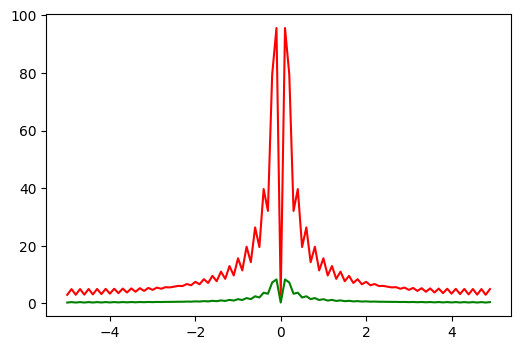

In [209]:
plotFFT(x, FFT(data), color = 'red')
plotFFT(x, FFT(data*np.vectorize(Hanning)(x)), color = 'green')

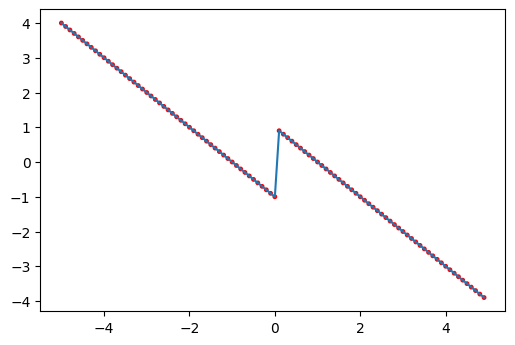

In [210]:
plt.plot(x, data)
#FFT of component wise dot product of window and data
windowedData = FFT(data*np.vectorize(Hanning)(x))

#transform windowed function back to normal
plt.scatter(x, np.real(iFFT(windowedData)/np.vectorize(Hanning)(x)),color='red', s = [6 for i in range(len(x))])